## Hand estimate the multinomial logit (mnl) model for dc metro hts 2017/2018 survey using pandas and numpy
Written by ajit makhija (03/21/2021)

first import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# read the data and filter hbw trips excluding outliers
df = pd.read_csv('hts_data/trip_processed.csv')
df = df[(df["PURP"]==1) & (df["CHOICE"]>0) & (df["SPEED"]>3) & (df["SPEED"]<100) & (df["DISTANCE"]<=120) & (df["INC"]==1)]


C:\Users\makhijaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (24,25,27,29,52,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Remove unwanted columns 

In [3]:
df.drop(columns=['DEPARTURE_TIME_HHMM','ARRIVAL_TIME_HHMM','MPO_TRAVEL_MODE','MPO_TRAVEL_MODE_DETAIL','MPO_TRANSIT_ACCESS_MODE','MPO_TRANSIT_EGRESS_MODE','MPO_SUBWAY_ACCESS_MODE','MPO_SUBWAY_EGRESS_MODE'], axis=1, inplace=True) 

In [4]:
df.head()

,HOUSEHOLD_ID,PERSON_ID,PERSNO,TRIPID,TRIPNO,O_PURPOSE,O_ACTIVITY,MPO_O_ACTIVITY,O_STATE_FIPS,O_STATE_COUNTY_FIPS,...,ExBusCost,PURP,SovAV,HovAV,MetroAV,CrAV,BusAV,ExBusAV,SPEED,INC
12814,170001127,17000112701,1,1.700000e+12,1,1,1,1,24,24021,...,425,1,1,1,1,1,1,1,12.106953,1
12815,170001127,17000112701,1,1.700000e+12,2,2,2,3,24,24021,...,425,1,1,1,1,1,1,1,12.106953,1
12889,170001414,17000141401,1,1.700000e+12,1,1,1,1,51,51059,...,625,1,1,1,1,1,1,1,26.090401,1
12890,170001414,17000141401,1,1.700000e+12,2,3,2,4,51,51510,...,625,1,1,1,1,1,1,1,43.484002,1
12891,170001414,17000141401,1,1.700000e+12,3,1,1,2,51,51059,...,625,1,1,1,1,1,1,1,19.834972,1


## Calcute the neccessary variables to estimate the maximum likelihood parameters using the Newton-Raphson method. 

In [5]:
df['SovChoice'] = np.where(df['CHOICE']==1,1,0)
df['HovChoice'] = np.where(df['CHOICE']==2,1,0)
df['MetroChoice'] = np.where(df['CHOICE']==3,1,0)
df['CrChoice'] = np.where(df['CHOICE']==4,1,0)
df['BusChoice'] = np.where(df['CHOICE']==5,1,0)
df['ExBusChoice'] = np.where(df['CHOICE']==6,1,0)

df['SovTTSovTT'] = df['SovTT']*df['SovTT']
df['SovTTSovCost'] = df['SovTT']*df['SovCost']
df['SovCostSovCost'] =  df['SovCost']*df['SovCost']

df['HovTTHovTT'] = df['HovTT']*df['HovTT']
df['HovTTHovCost'] = df['HovTT']*df['HovCost']
df['HovCostHovCost'] = df['HovCost']*df['HovCost']

df['MetroTTMetroTT'] = df['MetroTT']*df['MetroTT']
df['MetroTTMetroCost'] = 		df['MetroTT']*df['MetroCost']
df['MetroCostMetroCost'] =   	df['MetroCost']*df['MetroCost']

df['CrTTCrTT'] = df['CrTT']*df['CrTT']
df['CrTTCrCost'] =df['CrTT']*df['CrCost']
df['CrCostCrCost'] = df['CrCost']*df['CrCost']

df['BusTTBusTT'] =df['BusTT']*df['BusTT']
df['BusTTBusCost'] =df['BusTT']*df['BusCost']
df['BusCostBusCost'] =df['BusCost']*df['BusCost']


df['ExBusTTExBusTT'] = df['ExBusTT']*df['ExBusTT']
df['ExBusTTExBusCost'] =df['ExBusTT']*df['ExBusCost']
df['ExBusCostExBusCost'] =df['ExBusCost']*df['ExBusCost']

df.describe().T


,count,mean,std,min,25%,50%,75%,max
HOUSEHOLD_ID,1562.0,1.771980e+08,4.574191e+06,1.700011e+08,1.700964e+08,1.800737e+08,1.801585e+08,1.802553e+08
PERSON_ID,1562.0,1.771980e+10,4.574191e+08,1.700011e+10,1.700964e+10,1.800737e+10,1.801585e+10,1.802553e+10
PERSNO,1562.0,1.405250e+00,7.070963e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00
TRIPID,1562.0,1.770935e+12,4.542091e+10,1.700000e+12,1.700000e+12,1.800000e+12,1.800000e+12,1.800000e+12
TRIPNO,1562.0,2.111396e+00,1.704390e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.300000e+01
...,...,...,...,...,...,...,...,...
BusTTBusCost,1562.0,3.302125e+04,3.087361e+04,4.512000e+02,8.500000e+03,1.974325e+04,5.379375e+04,1.555125e+05
BusCostBusCost,1562.0,2.602177e+05,1.560365e+05,4.000000e+04,4.000000e+04,3.906250e+05,3.906250e+05,3.906250e+05
ExBusTTExBusTT,1562.0,6.121018e+03,7.914975e+03,5.089536e+00,5.849143e+02,2.887451e+03,8.436606e+03,6.191139e+04
ExBusTTExBusCost,1562.0,3.694001e+04,2.998353e+04,4.512000e+02,1.148250e+04,2.861938e+04,5.688531e+04,1.555125e+05


#    This function hand estimates the multinomial logit model using the Newton Raphson method. The goal is to estimate only the coefficients for generic variables i.e., cost and time coefficients
Computational steps are learned from Discrete Choice Analysis text book Ben-Akiva Moshe pg 82-84 and my course and thesis work with Dr Anthony Chen (USU)
These include 
1)  Choose an initial guess betas for B0=0 (Time) and B1=0 (Cost)
2)  Calculate utility functions and probabilites with initial betas
3)  Calculate JacobianMatrix (JM), Hessian Matrix (HM), Inverse Hessian Matrix (invHM), Dot Product of Inverse Hessian & Jacobian
4)  Calculate the updated betas; check the convergence if satisfied stop, if not go back to  step 1 

Results match with Biogeme estimates; caveat this function only works when all modes are available for each of survey records; can't figure out how to estimate parameters if not all modes are available  

![title](hts_data/solution.jpg)


In [6]:
def multinomiallogitestimate():

    B0=0
    B1=0
    B0_prev=B0
    B1_prev=B1
    
    iter=0
    error=0
    maxerror=10**(-10)
    df1 = pd.DataFrame(columns=['iter','Beta_Time','Beta_Cost','LL','error','Beta_Time_adjust','Beta_Cost_adjust','rho_sq'])
    for iter in range(0,100):
        df["expUSov"]= np.exp(B0*df["SovTT"]+B1*df["SovCost"])
        df["expUHov"]= np.exp(B0*df["HovTT"]+B1*df["HovCost"])
        df["expUMetro"]= np.exp(B0*df["MetroTT"]+B1*df["MetroCost"])
        df["expUCr"]= np.exp(B0*df["CrTT"]+B1*df["CrCost"])
        df["expUBus"]= np.exp(B0*df["BusTT"]+B1*df["BusCost"])
        df["expUExBus"]= np.exp(B0*df["ExBusTT"]+B1*df["ExBusCost"])

        df["Sumexp"] = df["expUSov"]+df["expUHov"]+df["expUMetro"]+df["expUCr"]+df["expUBus"]+df["expUExBus"]

        df["ProbSov"]= df["expUSov"]/df["Sumexp"]
        df["ProbHov"]= df["expUHov"]/df["Sumexp"]
        df["ProbMetro"]= df["expUMetro"]/df["Sumexp"]
        df["ProbCr"]= df["expUCr"]/df["Sumexp"]
        df["ProbBus"]= df["expUBus"]/df["Sumexp"]
        df["ProbExBus"]= df["expUExBus"]/df["Sumexp"]

        df["ProbTT"]= df["ProbSov"]*df['SovTT'] + \
                      df["ProbHov"]*df['HovTT'] + \
                      df["ProbMetro"]*df['MetroTT'] + \
                      df["ProbCr"]*df['CrTT'] + \
                      df["ProbBus"]*df['BusTT'] + \
                      df["ProbExBus"]*df['ExBusTT'] 

        df["ProbCost"]=df["ProbSov"] * df['SovCost'] + \
                       df["ProbHov"] * df['HovCost'] + \
                       df["ProbMetro"] * df['MetroCost'] + \
                       df["ProbCr"] * df['CrCost'] + \
                       df["ProbBus"] * df['BusCost'] + \
                       df["ProbExBus"] * df['ExBusCost']  
        # Calculate the functions to compute the Jacobian matrix Hessian matrix and Log Likelihood                       
        df["F1"]=(df["SovChoice"] - df["ProbSov"]) * df["SovTT"] + \
                 (df["HovChoice"] - df["ProbHov"]) * df["HovTT"] + \
                 (df["MetroChoice"] - df["ProbMetro"]) * df["MetroTT"] + \
                 (df["CrChoice"] - df["ProbCr"]) * df["CrTT"] + \
                 (df["BusChoice"] - df["ProbBus"]) * df["BusTT"] + \
                 (df["ExBusChoice"] - df["ProbExBus"]) * df["ExBusTT"]

        df["F2"]=(df["SovChoice"]-df["ProbSov"])*df["SovCost"] + \
                 (df["HovChoice"]-df["ProbHov"])*df["HovCost"] + \
                 (df["MetroChoice"]-df["ProbMetro"])*df["MetroCost"] + \
                 (df["CrChoice"]-df["ProbCr"])*df["CrCost"] + \
                 (df["BusChoice"]-df["ProbBus"])*df["BusCost"] + \
                 (df["ExBusChoice"]-df["ProbExBus"])*df["ExBusCost"]       

        df["S11"]=df["ProbTT"]*df["ProbTT"]- \
                  df["ProbSov"]*df['SovTTSovTT'] - \
                  df["ProbHov"]*df['HovTTHovTT'] - \
                  df["ProbMetro"]*df['MetroTTMetroTT'] - \
                  df["ProbCr"]*df['CrTTCrTT'] - \
                  df["ProbBus"]*df['BusTTBusTT'] - \
                  df["ProbExBus"]*df['ExBusTTExBusTT']

        df["S12"]=df["ProbTT"]*df["ProbCost"]- \
                  df["ProbSov"]*df['SovTTSovCost'] - \
                  df["ProbHov"]*df['HovTTHovCost'] - \
                  df["ProbMetro"]*df['MetroTTMetroCost'] - \
                  df["ProbCr"]*df['CrTTCrCost'] - \
                  df["ProbBus"]*df['BusTTBusCost'] - \
                  df["ProbExBus"]*df['ExBusTTExBusCost']

        df["S22"]=df["ProbCost"]*df["ProbCost"] - \
                 (df["ProbSov"]*df['SovCostSovCost'] + \
                  df["ProbHov"]*df['HovCostHovCost'] + \
                  df["ProbMetro"]*df['MetroCostMetroCost'] + \
                  df["ProbCr"]*df['CrCostCrCost'] + \
                  df["ProbBus"]*df['BusCostBusCost'] + \
                  df["ProbExBus"]*df['ExBusCostExBusCost'])      
        df["LL"]= df["SovChoice"]*np.log(df["ProbSov"]) + \
                  df["HovChoice"]*np.log(df["ProbHov"]) + \
                  df["MetroChoice"]*np.log(df["ProbMetro"]) + \
                  df["CrChoice"]*np.log(df["ProbCr"]) + \
                  df["BusChoice"]*np.log(df["ProbBus"]) + \
                  df["ExBusChoice"]*np.log(df["ProbExBus"]) 


        #Calculate  JacobianMatrix (JM), Hessian Matrix (HM), Inverse Hessian Matrix (invHM), Dot Product of Inverse Hessian Jacobian (invHMbyJM)
        JM = np.array([[df["F1"].sum()],
                       [df["F2"].sum()]])

        HM = np.array([[df["S11"].sum(),df["S12"].sum()],
                       [df["S12"].sum(),df["S22"].sum()]])

        if iter==0: LL0 = df["LL"].sum()
        LL = df["LL"].sum()
        invHM = np.linalg.inv(HM)  
        invHMbyJM = np.dot(invHM,JM)
        B0_adjust = invHMbyJM[0,0]
        B1_adjust = invHMbyJM[1,0]
        # populate the dataframe with the outputs for each iter 
        df1.loc[iter, ['iter']]            = iter
        df1.loc[iter, ['Beta_Time']]       = B0
        df1.loc[iter, ['Beta_Cost']]       = B1
        df1.loc[iter, ['LL']]              = LL       
        df1.loc[iter, ['error']]           = error
        df1.loc[iter, ['Beta_Time_adjust']]= B0_adjust       
        df1.loc[iter, ['Beta_Cost_adjust']]=B1_adjust
        df1.loc[iter, ['rho_sq']]=1-LL/LL0
            
        B0_prev=B0
        B1_prev=B1
        #new parameters equal diff of previous parameter minus dotproduct of invHessian and Jacobian
        B0 = B0-invHMbyJM[0,0]
        B1 = B1-invHMbyJM[1,0]
        # check convergence (max error at 10^-10) and return results in df1

        if iter==0:
            sumerror = (B0)**2+(B1)**2
        else:    
            sumerror = (B0-B0_prev)**2+(B1-B1_prev)**2
        error= (sumerror/2)**0.5
         
        if error < maxerror:
            return df1
            break   


In [7]:
results_by_iter=multinomiallogitestimate()


In [8]:
results_by_iter

,iter,Beta_Time,Beta_Cost,LL,error,Beta_Time_adjust,Beta_Cost_adjust,rho_sq
0,0,0,0,-2798.73,0,0.0156825,0.00277204,0
1,1,-0.0156825,-0.00277204,-2267.14,0.0112611,0.014406,0.00115144,0.18994
2,2,-0.0300885,-0.00392348,-2173.03,0.0102191,0.00866328,0.000550069,0.223567
3,3,-0.0387518,-0.00447355,-2159.26,0.0061382,0.00172036,0.000111842,0.228484
4,4,-0.0404722,-0.00458539,-2158.89,0.00121904,5.1051e-05,3.39567e-06,0.228617
5,5,-0.0405232,-0.00458879,-2158.89,3.61783e-05,4.28226e-08,2.88489e-09,0.228617
6,6,-0.0405233,-0.00458879,-2158.89,3.03488e-08,3.02414e-14,2.04988e-15,0.228617


In [9]:
results_by_iter.tail(1)

,iter,Beta_Time,Beta_Cost,LL,error,Beta_Time_adjust,Beta_Cost_adjust,rho_sq
6,6,-0.0405233,-0.00458879,-2158.89,3.03488e-08,3.02414e-14,2.04988e-15,0.228617


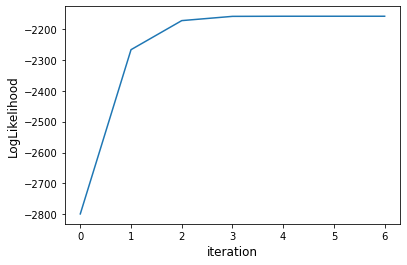

In [10]:
# red dashes, blue squares and green triangles
plt.plot(results_by_iter['iter'], results_by_iter['LL'])
plt.xlabel('iteration', fontsize=12)
plt.ylabel('LogLikelihood', fontsize=12)
plt.show()